<a href="https://colab.research.google.com/github/Snehashub/Snehashub/blob/main/MedInsurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



Data colelction and Analysis

In [2]:
#loading a data from csv file to pandas dataFrame
insurance_dataset = pd.read_csv('/content/insurance.csv')

#first 5 rows of the dataFrame
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#number of rows and colums(defining shape)
insurance_dataset.shape

(1338, 7)

In [4]:
#finding more info on the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical variable
1. sex
2. smoker
3. region

In [5]:
#check missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [6]:
#Statistical inference of dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#age value distribution
sb.set()

In [8]:
plt.figure(figsize =(6,6))

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<ipython-input-9-19d41496861c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(insurance_dataset['age'])


<Axes: xlabel='age', ylabel='Density'>

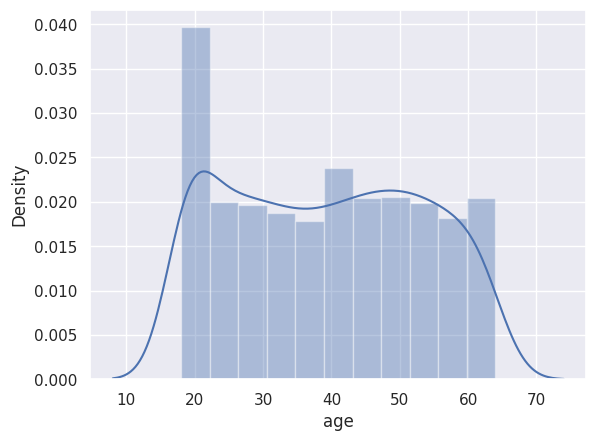

In [9]:
sb.distplot(insurance_dataset['age'])

Text(0.5, 1.0, 'Age Distribution')

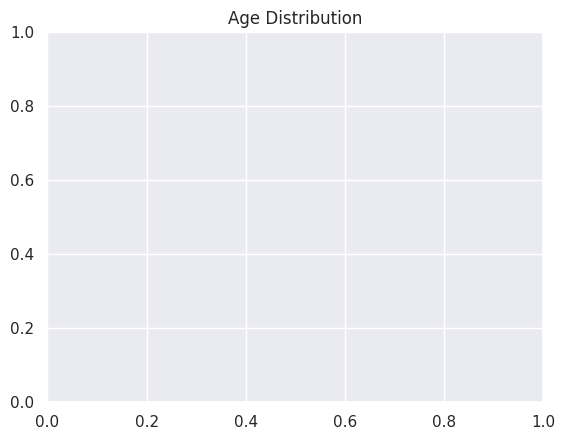

In [10]:
plt.title('Age Distribution')

In [11]:
plt.show()

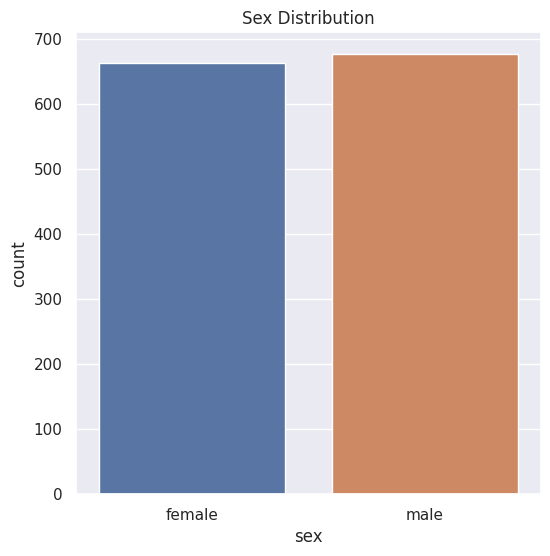

In [12]:
plt.figure(figsize=(6,6))
sb.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [13]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-14-7060f2cd34ff>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(insurance_dataset['bmi'])


AttributeError: ignored

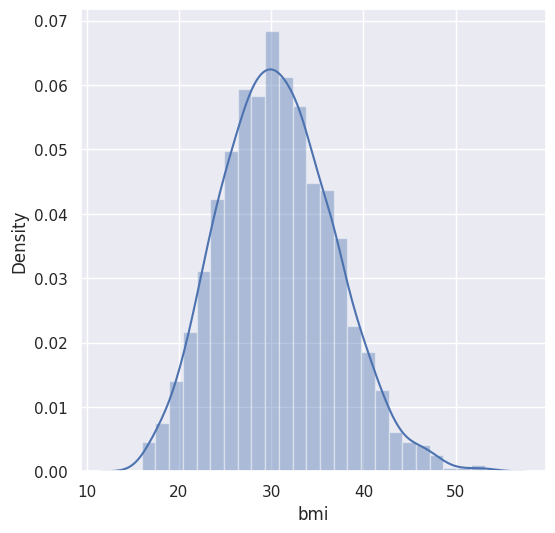

In [14]:
#bmi distribution
plt.figure(figsize =(6,6))
sb.distplot(insurance_dataset['bmi'])
plt.tilte('bmi Distribution')
plt.show()

Normal BMI range = 18.5 to 24.9

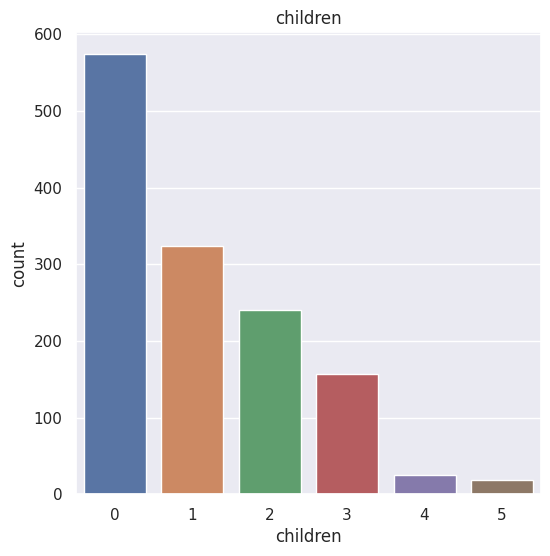

In [15]:
#children column
plt.figure(figsize=(6,6))
sb.countplot(x='children', data=insurance_dataset)
plt.title('children')
plt.show()

In [16]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

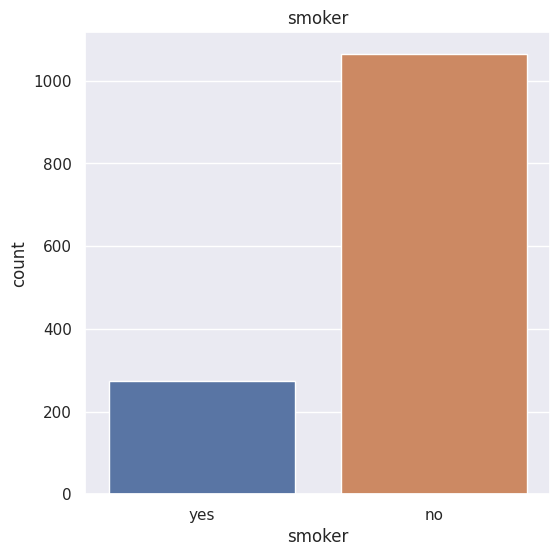

In [17]:
#Smoker column
plt.figure(figsize=(6,6))
sb.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [18]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

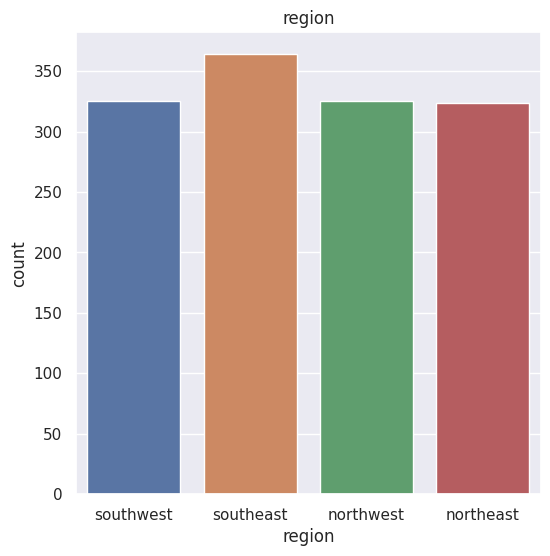

In [19]:
#region column
plt.figure(figsize=(6,6))
sb.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [20]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-21-1497ca1da753>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(insurance_dataset['charges'])


AttributeError: ignored

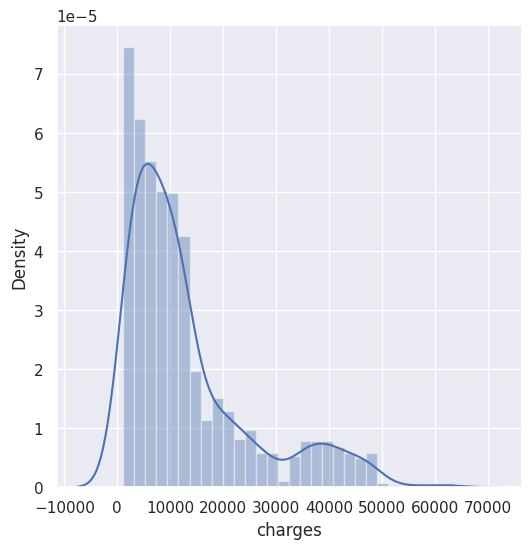

In [21]:
#charges distribution
plt.figure(figsize =(6,6))
sb.distplot(insurance_dataset['charges'])
plt.tilte('charges Distribution')
plt.show()

Data Pre-processing

Encoding the categorical features

In [22]:
#encoding sex column
insurance_dataset.replace({'sex':{'male':0, 'female':1}},inplace=True)

#encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}},inplace=True)

#encoding region column
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}},inplace=True)

Features and target variable split

In [23]:
x = insurance_dataset.drop(columns='charges', axis=1)
y = insurance_dataset['charges']

print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [24]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Train and Test data split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [36]:
#load linear regression model
regressor = LinearRegression()

regressor.fit(x_train, y_train)




LinearRegression()

Model Evaluation

In [42]:
#Prediction analysis on training data
training_data_prediction = regressor.predict(x_train)

#finding R square
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R Squared Value: ', r2_train)


R Squared Value:  0.751505643411174


In [46]:
#Prediction analysis on test data
test_data_prediction = regressor.predict(x_test)

#finding R square
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R Squared Value: ', r2_test)

R Squared Value:  0.7447273869684076


Build a predictive system

In [47]:
input_data = (31,1,25.74,0,1,0)

In [48]:
#change input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [51]:
#reshape array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print("The insurance cost is USD", prediction[0])

[3760.0805765]
The insurance cost is USD 3760.080576496057


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
